In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

 

In [3]:
df=pd.read_excel ('ENB2012_data.xlsx' ) 
 

In [4]:
df.describe(include='all')


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
#rename columns 
column_names =   { 'X1' : 'Relative_Compactness' , 'X2' :'Surface_Area' ,'X3' :'Wall_Area' , 'X4' :'Roof_Area' ,
                     'X5' :'Overall_Height' , 'X6' : 'Orientation' , 'X7' : 'Glazing_Area' , 'X8' :'Glazing_Area_Distribution' ,                    
                     'Y1' : 'Heating_Load' ,  'Y2' : 'Cooling_Load' } 

In [6]:
df = df.rename(columns = column_names) 

In [7]:
#select a sample of the dataset
simple_linear_reg_df = df[[ 'Relative_Compactness' , 'Cooling_Load' ]].sample( 15, random_state=2)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

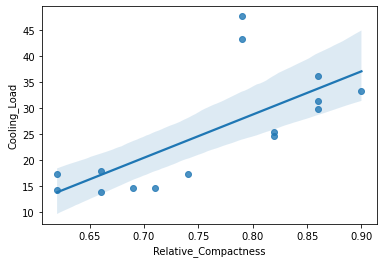

In [8]:
#regression plot
sns.regplot(x= "Relative_Compactness" , y= "Cooling_Load" , 
            data=simple_linear_reg_df) 

In [9]:
#MEASURING REGRESSION PERFORMANCE 
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [11]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [13]:
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [14]:
#obtain predictions
predicted_values = linear_model.predict(x_test)
print(predicted_values)

[0.19171335 0.57861912 0.73990043 0.71445968 0.75810474 0.24871954
 0.16921186 0.60311106 0.24501095 0.54737107 0.31823959 0.65925977
 0.69331771 0.30343424 0.19027072 0.71785863 0.57207665 0.3159481
 0.26210611 0.74693205 0.69900815 0.06941108 0.60925257 0.3270687
 0.21248809 0.74445789 0.33479036 0.18715589 0.80079078 0.27003867
 0.67806128 0.73420999 0.14215292 0.28571674 0.5633094  0.8076142
 0.33505064 0.1353295  0.72354907 0.24727691 0.82414823 0.15809126
 0.11176667 0.16578739 0.117612   0.15327352 0.48452124 0.68989323
 0.75354728 0.72015012 0.10167366 0.66495022 0.09850946 0.25072523
 0.76371047 0.76826793 0.73647596 0.62801172 0.15118472 0.29887678
 0.19284633 0.59447275 0.60356213 0.76484345 0.5686777  0.92641767
 0.68193683 0.31937257 0.66950767 0.23759893 0.54397212 0.25185821
 0.23182538 0.72232476 0.28684972 0.68405669 0.63825962 0.74124161
 0.25641567 0.53042681 0.13419651 0.64395006 0.26182199 0.75688705
 0.23751582 0.90252292 0.91959424 0.82870569 0.25984014 0.1811813

In [15]:
#Evaluate the model
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [16]:
#Residual Sum of Squares (RSS)
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

1.817

In [17]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [18]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

Text(0, 0.5, 'Predicted')

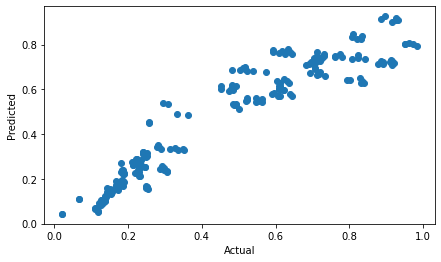

In [21]:
#Plot the results
plt.figure(figsize=(7,4))
plt.scatter(y_test, predicted_values)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [42]:
linear_model.score(x_test, y_test)

0.8938550769308063

In [43]:
linear_model.score(x_train, y_train)

0.9252691483376907

In [48]:
#PENALIZATION METHODS
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [49]:
ridge_reg.score(x_test, y_test)

0.8920016069098895

In [50]:
ridge_reg.score(x_train, y_train)

0.9240089033294313

In [45]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [46]:
lasso_reg.score(x_test, y_test)

0.8877966403192161

In [47]:
lasso_reg.score(x_train, y_train)

0.9205508086833689

In [69]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [70]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [71]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [72]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482
